In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dash 
import dash_core_components as dcc
import dash_html_components as html 
from dash.dependencies import Input,Output
import warnings
warnings.filterwarnings('ignore')

C:\Users\moham\AppData\Local\Temp\ipykernel_18880\3084101378.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\moham\AppData\Local\Temp\ipykernel_18880\3084101378.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
df=pd.read_csv("Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Plotting each Pclass with total Fare Paid

In [3]:
Class_Fair=df["Fare"].groupby(df["Pclass"]).sum()
Class_Fair

Pclass
1    10087.9918
2     2064.7957
3     2703.7501
Name: Fare, dtype: float64

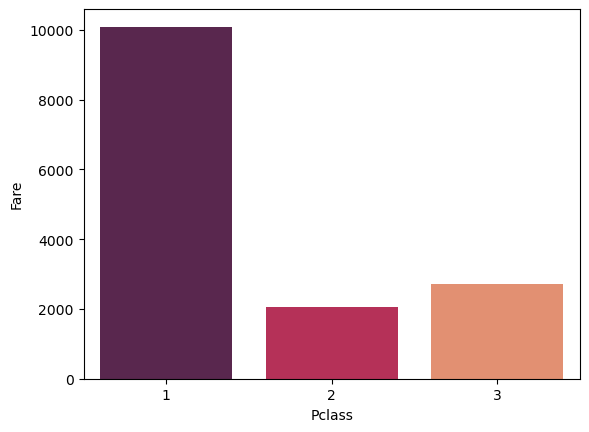

In [4]:
sns.barplot(Class_Fair,palette="rocket")
plt.show()

## Plotting Age Column 

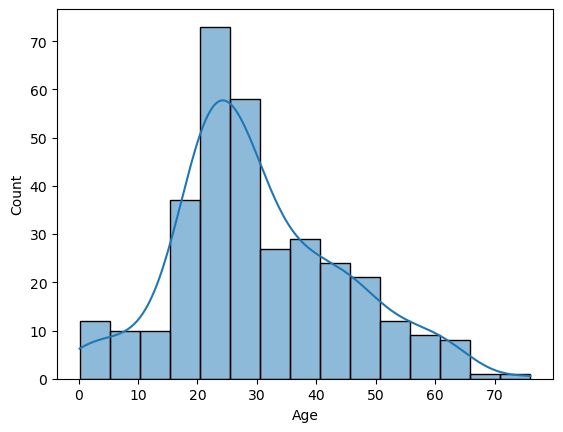

In [5]:
sns.histplot(df["Age"],kde=True)
plt.show()

## Plotting Embarkes classes with Count of servive

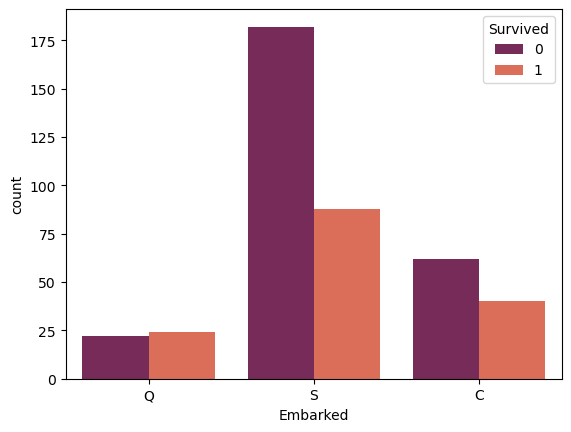

In [6]:
sns.countplot(x=df["Embarked"],hue=df["Survived"],palette="rocket")

plt.show()

## Plotting num of people from each class

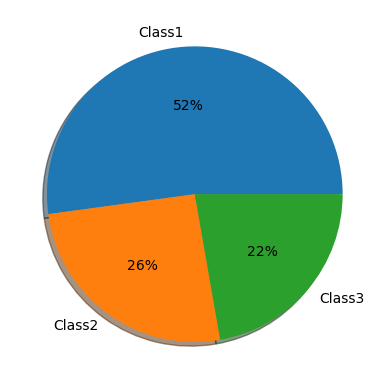

In [7]:

plt.pie(df["Pclass"].value_counts(),labels=["Class1","Class2","Class3"],autopct='%1.f%%',shadow=True)

plt.show()

Count and Plot Amount of money paid (male,female)

In [8]:
Amount=df["Fare"].groupby(df["Sex"]).sum()
Amount

Sex
female    7561.6502
male      7294.8874
Name: Fare, dtype: float64

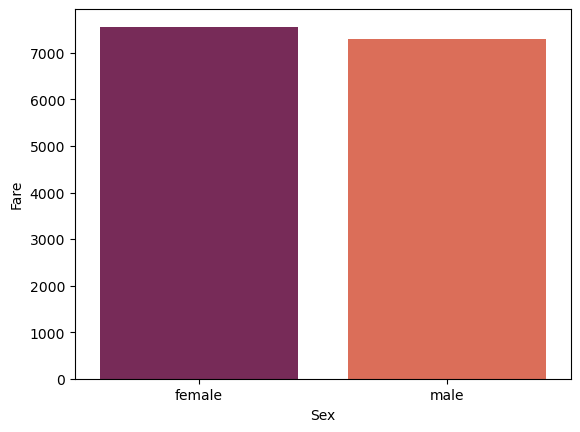

In [9]:
sns.barplot(Amount,palette="rocket")

plt.show()

In [10]:
app = dash.Dash()

app.layout = html.Div(children=[
    html.H1('Titanic Insights', 
            style={'textAlign': 'center', 'font-size': 30}),
    
    html.Div([
        html.Div([
            html.Label("Input Class", style={'font-size': 20}),
            dcc.Input(id='input_class', value=1, type='number', 
                      style={'width': '100%', 'height': '40px', 'font-size': 20})
        ], style={'display': 'inline-block', 'width': '45%', 'verticalAlign': 'top', 
                  'margin-right': '20px'}),
        
        html.Div([
            html.Label("Select Embarked", style={'font-size': 20}),
            dcc.Dropdown(
                id='input_embarked',
                options=[
                    {'label': '(C) Cherbourg', 'value': 'C'},
                    {'label': '(Q) Queenstown', 'value': 'Q'},
                    {'label': '(S) Southampton', 'value': 'S'}
                ],
                value='Q',
                style={'width': '100%', 'font-size': 20}
            )
        ], style={'display': 'inline-block', 'width': '45%', 'verticalAlign': 'top'})
    ], style={'width': '80%', 'margin': '0 auto', 'textAlign': 'center'}),
    
    html.Br(),
    html.Br(),
    
    html.Div([
        dcc.Graph(id='bar-plot')
    ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),
    
    html.Div([
        dcc.Graph(id='fare-plot')
    ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'})
])

# Callback for the first graph: Class and Sex Count
@app.callback(
    Output('bar-plot', 'figure'),
    Input('input_class', 'value')
)
def update_class_graph(selected_class):
    TClass = df[df['Pclass'] == selected_class]
    fig1 = px.bar(x=TClass["Sex"].value_counts().index, 
                  y=TClass["Sex"].value_counts().values,
                  title=f'Class {selected_class} Sex Count')
    fig1.update_layout(
        xaxis_title='Sex',
        yaxis_title='Count'
    )
    return fig1

# Callback for the second graph: Embarked and Total Fare
@app.callback(
    Output('fare-plot', 'figure'),
    Input('input_embarked', 'value')
)
def update_embarked_graph(selected_embarked):
    TEmbarked = df[df['Embarked'] == selected_embarked]
    fig2 = px.bar(x=TEmbarked["Sex"], 
                  y=TEmbarked["Fare"], 
                  title=f'Embarked "{selected_embarked}" Total Fare')
    fig2.update_layout(
        xaxis_title='Sex',
        yaxis_title='Total Fare'
    )
    return fig2

if __name__ == '__main__':
    app.run_server(debug=True)
